### Train model
Model is inspired by Baidu 2.
See models/model_2.png for architecture diagram. Save model on every epoch.

### Prepare train and valid data

In [1]:
from src.data_generator import make_audio_gen


TRAIN_CORPUS = "data_st/train_corpus.json"
VALID_CORPUS = "data_st/valid_corpus.json"

MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 2
MODEL_NAME = "model_2"
MINI_BATCH_SIZE = 250
SORT_BY_DURATION=False
MAX_DURATION = 10.0

audio_gen = make_audio_gen(TRAIN_CORPUS, VALID_CORPUS, spectrogram=False, mfcc_dim=MFCC_DIM,
                           minibatch_size=MINI_BATCH_SIZE, sort_by_duration=SORT_BY_DURATION,
                           max_duration=MAX_DURATION)
# add the training data to the generator
audio_gen.load_train_data()
audio_gen.load_validation_data()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Run training

In [2]:
from src.train import train
from src.models import model_2
from src.char_map import char_map, index_map

EPOCHS = 40
MODEL_NAME = "model_2"

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)

train(audio_gen, input_to_softmax=model, model_name=MODEL_NAME, epochs=EPOCHS, minibatch_size=MINI_BATCH_SIZE)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         375750    
_________________________________________________________________
bt_r

### Load saved model

In [3]:
from src.char_map import char_map, index_map
from src.models import model_2

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_2"
model.load_weights('models/' + model_name + '.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000      
__________

### Loss

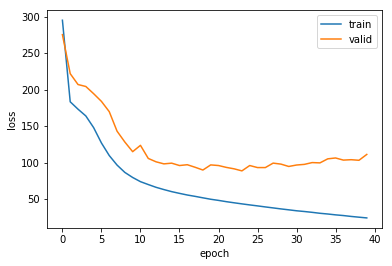

In [4]:
from src.plot import plot_hist

model_name = "model_2"
plot_hist(model_name)

### Word Error Rate - train

In [ ]:
from src.predict import calculate_wer

calculate_wer(model, model_name, audio_gen, 'train', audio_gen.train_length)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
wer: 13
wer: 4
wer: 23
processed 5560 in 0 minutes
wer: 4
wer: 4
wer: 3
wer: 6
wer: 11
wer: 5
wer: 4
wer: 7
wer: 5
wer: 4
processed 5570 in 1 minutes
wer: 15
wer: 2
wer: 11
wer: 6
wer: 4
wer: 10
wer: 15
wer: 5
wer: 1
wer: 4
processed 5580 in 2 minutes
wer: 7
wer: 14
wer: 19
wer: 10
wer: 9
wer: 11
wer: 2
wer: 7
wer: 16
wer: 9
processed 5590 in 3 minutes
wer: 5
wer: 4
wer: 14
wer: 4
wer: 7
wer: 3
wer: 5
wer: 5
wer: 8
wer: 6
processed 5600 in 4 minutes
wer: 5
wer: 23
wer: 10
wer: 8
wer: 2
wer: 6
wer: 7
wer: 7
wer: 3
wer: 1
processed 5610 in 5 minutes
wer: 8
wer: 5
wer: 6
wer: 1
wer: 10
wer: 6
wer: 7
wer: 7
wer: 3
wer: 1
processed 5620 in 6 minutes
wer: 9
wer: 4
wer: 8
wer: 5
wer: 5
wer: 3
wer: 2
wer: 5
wer: 8
wer: 7
processed 5630 in 6 minutes
wer: 2
wer: 3
wer: 5
wer: 9
wer: 13
wer: 10
wer: 14
wer: 9
wer: 10
wer: 12
processed 5640 in 8 minutes
wer: 7
wer: 5
wer: 2
wer: 13
wer: 3
wer: 1
wer:

In [ ]:
import numpy as np
from src.predict import load_wer

wer = load_wer(model_name, 'train')
print("WER mean=%f std=%f" % (np.std(wer), np.mean(wer)))

### Word Error Rate - validation

In [ ]:
from src.predict import calculate_wer
from src.data_generator import VALID_LENGTH

calculate_wer(model, model_name, 'validation', VALID_LENGTH)

In [ ]:
import numpy as np
from src.predict import load_wer

wer = load_wer(model_name, 'validation')
print("WER mean=%f std=%f" % (np.std(wer), np.mean(wer)))

### Sample prediction - training

In [ ]:
import numpy as np
import pickle
from src.predict import predict

predict(0, 'train', model)
predict(1, 'train', model)
predict(2, 'train', model)
predict(3, 'train', model)
predict(4, 'train', model)
predict(5, 'train', model)
predict(6, 'train', model)
predict(7, 'train', model)
predict(8, 'train', model)
predict(9, 'train', model)

### Sample prediction - validation

In [ ]:
import numpy as np
import pickle
from src.predict import predict

wer = pickle.load(open('models/' + model_name + '_validation_wer.pickle', "rb" ))
wer_index = np.argsort(wer)
predict(wer_index[0], 'validation', model)
predict(wer_index[1], 'validation', model)
predict(wer_index[2], 'validation', model)
predict(wer_index[3], 'validation', model)
predict(wer_index[4], 'validation', model)
predict(wer_index[5], 'validation', model)
predict(wer_index[-1], 'validation', model)
predict(wer_index[-2], 'validation', model)
predict(wer_index[-3], 'validation', model)
predict(wer_index[-4], 'validation', model)
predict(wer_index[-5], 'validation', model)
predict(wer_index[-6], 'validation', model)